# Delivrable 3 Captionning

# Sommaire

1. [Introduction](#1-introduction)
   - 1.1. [Objectif du projet](#11-objectif-du-projet)
   - 1.2. [Problématique](#12-problématique)

2. [Exploration du Dataset](#2-exploration-du-dataset)
   - 2.1. [Chemins du dataset](#21-chemins-du-dataset)
   - 2.2. [Exploration des résolutions d'images](#22-exploration-des-resolutions-dimages)
   - 2.3. [Répartition des annotations par catégorie](#23-repartition-des-annotations-par-categorie)
   - 2.4. [Répartition des annotations par image](#24-repartition-des-annotations-par-image)

3. [Préparation des légendes](#3-preparation-des-legendes)

4. [Architecture de Captioning d'Images](#4-architecture-de-captioning)
   - 4.1. [Injecting Architecture](#41-injecting-architecture)
       - 4.1.1. [Choix du modèle CNN pour l'extraction de caractéristiques](#411-choix-du-modele-cnn-pour-lextraction-de-caracteristiques)
       - 4.1.2. [Transfert Learning](#412-transfert-learning)
           - 4.1.2.A. [Feature Extraction (Extraction de caractéristiques)](#412a-feature-extraction-extraction-de-caracteristiques)
           - 4.1.2.B. [Fine Tuning (Affinage)](#412b-fine-tuning-affinage)
           - 4.1.2.C. [Full Fine Tuning](#412c-full-fine-tuning)
       - 4.1.3. [Construction du modèle RNN](#413-construction-du-modele-rnn)
           - 4.1.3.A. [Construction du modèle LSTM](#413a-construction-du-modele-lstm)
           - 4.1.3.B. [Construction du modèle GRU](#413b-construction-du-modele-gru)
       - 4.1.4. [Entraînement des modèles](#414-entrainement-des-modeles)
       - 4.1.5. [Évaluation et tests](#415-evaluation-et-tests)
       - 4.1.6. [Tableau comparatif Injecting Architecture](#416-tableau-comparatif-injecting-architecture)

   - 4.2. [Merging Architecture](#42-merging-architecture)
       - 4.2.1. [Choix du modèle CNN](#421-choix-du-modele-cnn)
       - 4.2.2. [Transfert Learning](#422-transfert-learning)
           - 4.2.2.A. [Feature Extraction](#422a-feature-extraction)
           - 4.2.2.B. [Fine Tuning](#422b-fine-tuning)
           - 4.2.2.C. [Full Fine Tuning](#422c-full-fine-tuning)
       - 4.2.3. [Construction du modèle RNN](#423-construction-du-modele-rnn)
           - 4.2.3.A. [Construction du modèle LSTM](#423a-construction-du-modele-lstm)
           - 4.2.3.B. [Construction du modèle GRU](#423b-construction-du-modele-gru)
       - 4.2.4. [Entraînement des modèles](#424-entrainement-des-modeles)
       - 4.2.5. [Évaluation et tests](#425-evaluation-et-tests)
       - 4.2.6. [Tableau comparatif Merging Architecture](#426-tableau-comparatif-merging-architecture)

5. [Conclusion](#5-conclusion)
   - 5.1. [Tableau comparatif final](#51-tableau-comparatif-final)


# 1-Introduction

La détection d'objets est un problème fondamentalement important à notre époque, car elle a des applications variées dans des domaines tels que la surveillance, les véhicules autonomes, et l'analyse d'images médicales. Ce problème se divise généralement en deux tâches principales :
- **Classification** : Identifier les objets présents dans une image en fonction de leurs caractéristiques visuelles (features).
- **Localisation d'objets** : Détecter la position précise de ces objets à l'aide de boîtes de délimitation ou de masques de segmentation.

Le principe de base est de retrouver, à partir d'une image, plusieurs objets afin de créer une description textuelle qui représente fidèlement le contenu visuel de l'image. Cette tâche est au cœur des défis actuels en vision par ordinateur, et plusieurs jeux de données ont été créés pour évaluer les performances des modèles dans ce domaine.

Parmi les plus utilisés, nous avons :
- **PASCAL-VOC** et
- **MS COCO**

**PASCAL VOC** est un dataset plus ancien et plus petit comparé à MS COCO. Conçu principalement pour des problèmes de détection et de segmentation d'objets, il offre un ensemble relativement réduit de classes, ce qui le rend utile pour des recherches académiques et pour tester rapidement des algorithmes sur un dataset de taille modeste.

Cependant, pour notre projet, nous allons utiliser le dataset **MS COCO** (Common Objects in Context). MS COCO est non seulement plus vaste, mais il introduit également des annotations plus complexes, telles que la segmentation d'objets par polygone et la génération de légendes d'images (captions). Pour exploiter pleinement la richesse de ce dataset, nous utiliserons des techniques de **transfert learning**. Le transfert learning est une approche couramment utilisée dans les projets de vision par ordinateur. Elle permet de tirer parti des connaissances qu'un modèle a déjà acquises sur un large ensemble de données, et d'améliorer ainsi les performances sur de nouveaux datasets avec moins de données et un temps d'entraînement réduit.

## 1.1-Objectif du projet

Dans ce projet, notre objectif est de concevoir un modèle capable de **générer automatiquement des légendes descriptives** pour des images en se basant sur le dataset **MS COCO**. Pour ce faire, nous allons exploiter une architecture de réseau de neurones à deux parties :
- **Un réseau CNN (Convolutional Neural Network)**, qui extrait les caractéristiques visuelles des images.
- **Un réseau RNN (Recurrent Neural Network)**, qui prend en entrée ces caractéristiques visuelles et génère des descriptions textuelles séquentielles (légendes) pour les images.

Le **réseau CNN** est responsable de l'encodage des images, en les convertissant en une représentation compacte. Cette représentation est ensuite utilisée par le **réseau RNN** pour produire des légendes descriptives en langage naturel. Le CNN utilisé dans ce projet sera un **modèle pré-entraîné**, tel que **ResNet**, **VGG**, ou **Inception**, initialement entraîné sur MS COCO pour la reconnaissance d'objets. Ce modèle sera ensuite ajusté pour répondre aux besoins de la génération de légendes.

## 1.2-Problématique

Le défi principal de ce projet est de développer un modèle capable de générer des **descriptions cohérentes et précises** pour des images complexes, où plusieurs objets interagissent. Cela inclut non seulement la détection des objets, mais aussi la compréhension du contexte et des relations entre ces objets, tout en produisant une phrase en langage naturel qui capture cette information. Il est également essentiel de pouvoir **évaluer automatiquement** la qualité des légendes générées à l'aide de métriques comme le **BLEU**.


# 2-Exploration du dataset

In [9]:
from pycocotools.coco import COCO
import os
import matplotlib.pyplot as plt
import numpy as np
import os
import random
from collections import Counter
import json
import collections

## 2.1-Chemins du dataset

In [10]:
# Définir le répertoire de base
base_dir = os.getcwd()  # Répertoire courant
relative_path = r"../../DataSets/Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

# Chemins pour les images et les fichiers d'annotations
train_images_dir = os.path.join(dataset_dir, 'train2014/')
val_images_dir = os.path.join(dataset_dir, 'val2014/')
train_annotations_file = os.path.join(dataset_dir, 'annotations\captions_train2014.json')
annFile = os.path.join(dataset_dir, 'annotations\instances_train2014.json')

# Affichage des chemins
print("Training images directory:", train_images_dir)
print("Validation images directory:", val_images_dir)
print("Training annotations file:", train_annotations_file)
print("Instance annotations file:", annFile)

Training images directory: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\train2014/
Validation images directory: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\val2014/
Training annotations file: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\annotations\captions_train2014.json
Instance annotations file: c:\Users\steve\Documents\GitHub\DataSciencePictureDesc\DataSets\Dataset_delivrable_3\annotations\instances_train2014.json


In [11]:
# --- Lecture des Annotations ---
# Charger le fichier d'annotations
with open(train_annotations_file, 'r') as f:
    annotations = json.load(f)

# Grouper toutes les annotations ayant le même identifiant d'image
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
    caption = val['caption']
    # Construire le chemin d'accès à l'image à partir de l'ID d'image
    image_path = os.path.join(train_images_dir, 'COCO_train2014_' + '%012d.jpg' % (val['image_id']))
    # Rajout du caption associé à image_path
    image_path_to_caption[image_path].append(caption)

# Vérifiez le contenu de image_path_to_caption
print(f"Nombre d'images avec annotations: {len(image_path_to_caption)}")

Nombre d'images avec annotations: 82783


In [3]:
coco = COCO(train_annotations_file)

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!


In [4]:
print(f"Nombre total d'images : {len(coco.getImgIds())}")
print(f"Nombre total de légendes : {len(coco.getAnnIds())}")

Nombre total d'images : 82783
Nombre total de légendes : 414113


In [5]:
random.seed(42)
img_ids = coco.getImgIds()
random_img_id = random.choice(img_ids)
img_data = coco.loadImgs(random_img_id)[0]
print(f"Dimensions de l'image : {img_data['width']} x {img_data['height']}")

Dimensions de l'image : 640 x 371


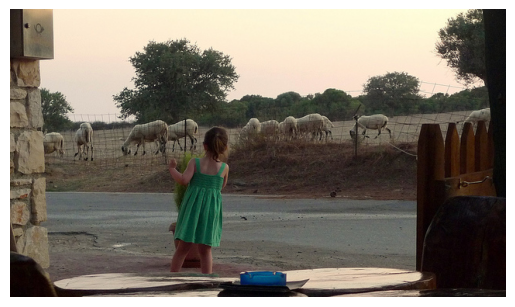

In [6]:
img_path = os.path.join(train_images_dir, img_data['file_name'])
img = plt.imread(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [7]:
caption_lengths = [len(cap['caption'].split()) for cap in coco.loadAnns(coco.getAnnIds())]
mean_caption_length = sum(caption_lengths) / len(caption_lengths)

print(f"Longueur moyenne des légendes : {mean_caption_length} mots")


Longueur moyenne des légendes : 10.458350740015407 mots


il y a donc en moyenne 10 mot pour decrire une image

In [8]:
# Calculer le nombre de légendes par image
image_ids = coco.getImgIds()
captions_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Statistiques
max_captions = max(captions_per_image)
min_captions = min(captions_per_image)
mean_captions = sum(captions_per_image) / len(captions_per_image)

print(f"Légendes par image - Max : {max_captions}, Min : {min_captions}, Moyenne : {mean_captions}")


Légendes par image - Max : 7, Min : 5, Moyenne : 5.0023917954169335


Ici, nous avons le nombre de légendes associées à chaque image.

## 2.2-Exploration de la répartition des résolution par image

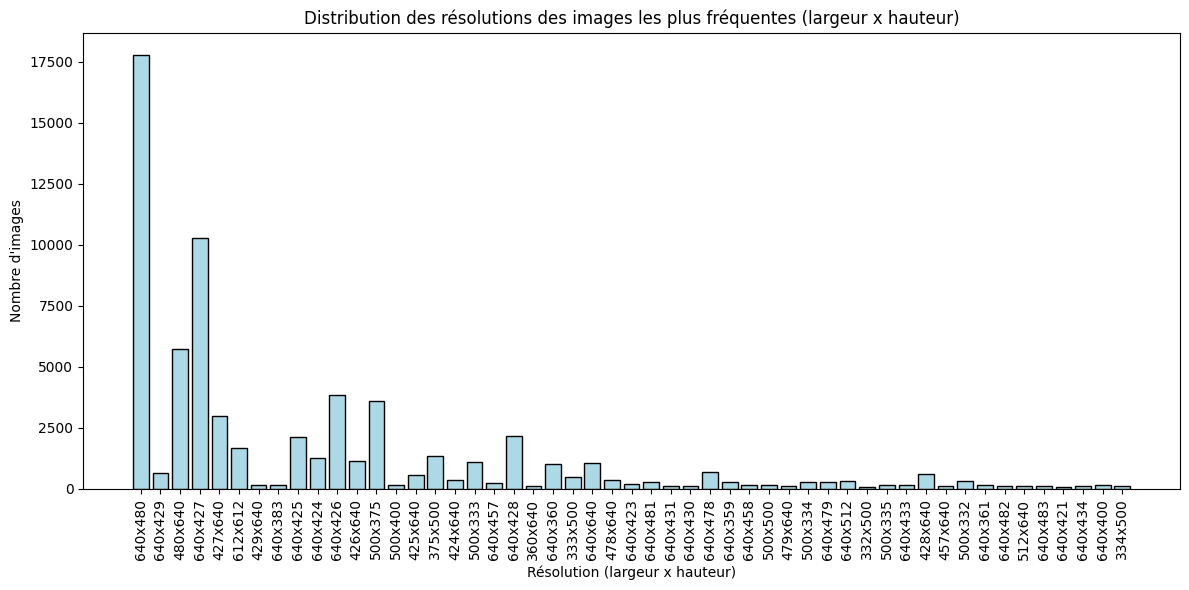

In [9]:
from collections import Counter
import matplotlib.pyplot as plt

# Charger toutes les images avec l'objet COCO
img_ids = coco.getImgIds()
img_data = coco.loadImgs(img_ids)

# Extraire les largeurs et hauteurs des images
heights = [img['height'] for img in img_data]
widths = [img['width'] for img in img_data]

# Créer une liste de tuples (largeur, hauteur)
dimensions = [(widths[i], heights[i]) for i in range(len(widths))]

# Compter le nombre d'images pour chaque résolution unique
dimension_counts = Counter(dimensions)

# Filtrer les dimensions les plus fréquentes (au moins 100 occurrences)
common_dimensions = {dim: count for dim, count in dimension_counts.items() if count >= 100}

# Extraire les résolutions et leur fréquence
resolutions, counts = zip(*common_dimensions.items())

# Générer des labels pour les résolutions sous la forme "largeur x hauteur"
resolution_labels = [f"{width}x{height}" for width, height in resolutions]

# Visualiser les résolutions les plus fréquentes
plt.figure(figsize=(12, 6))
plt.bar(resolution_labels, counts, color='lightblue', edgecolor='black')

# Ajouter un titre et des labels d'axes
plt.title('Distribution des résolutions des images les plus fréquentes (largeur x hauteur)')
plt.xlabel('Résolution (largeur x hauteur)')
plt.ylabel('Nombre d\'images')

# Rotation des labels pour une meilleure lisibilité
plt.xticks(rotation=90)

# Afficher le graphique avec ajustement
plt.tight_layout()
plt.show()


La majorité des images du dataset MS COCO ont des résolutions relativement homogènes, avec une forte concentration autour de résolutions comme 640x480 et 480x640. Cela signifie que nous pouvons envisager de redimensionner toutes les images à une résolution commune (comme 640x480), sans perdre trop de détails dans la majorité des images. 

## 2.3-Exploration de la répartition des annotation par catégorie

loading annotations into memory...
Done (t=6.48s)
creating index...
index created!


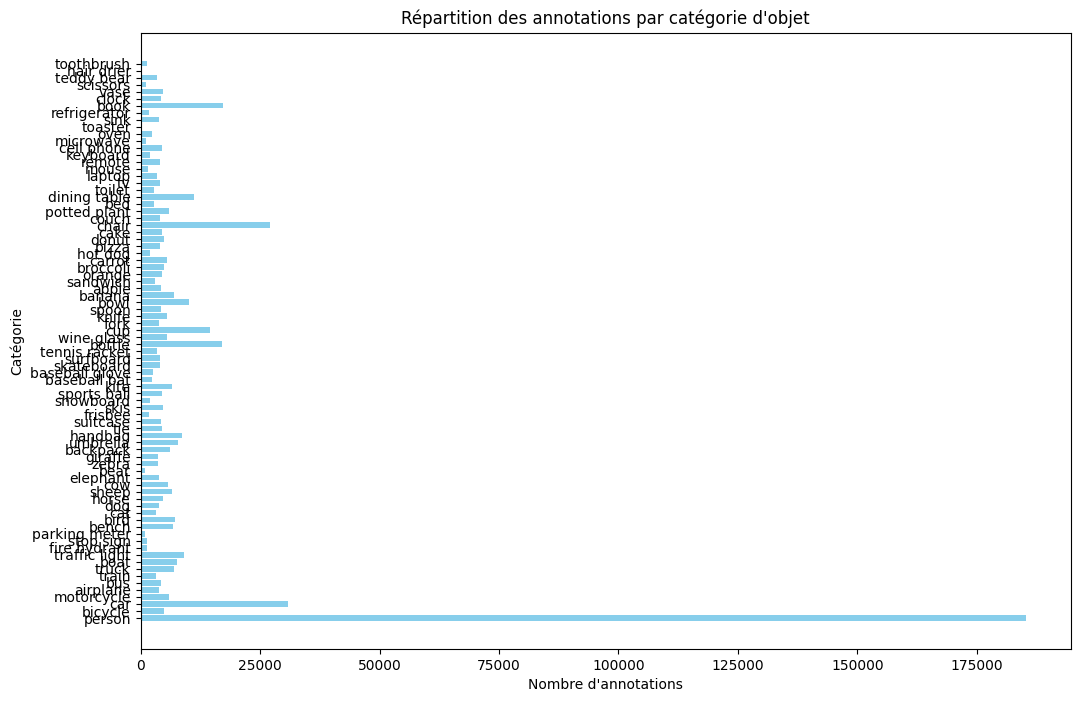

In [10]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Charger les annotations des objets à partir du fichier COCO
coco = COCO(annFile)

# Charger les catégories d'objets
categories = coco.loadCats(coco.getCatIds())
category_names = [cat['name'] for cat in categories]  # Liste des noms de catégories

# Compter le nombre d'annotations pour chaque catégorie
category_counts = [len(coco.getAnnIds(catIds=[cat['id']])) for cat in categories]

# Création du graphique en barres horizontales
plt.figure(figsize=(12, 8))
plt.barh(category_names, category_counts, color='skyblue')  # Barres horizontales

# Ajouter un titre et des labels d'axes
plt.title('Répartition des annotations par catégorie d\'objet')
plt.xlabel('Nombre d\'annotations')
plt.ylabel('Catégorie')

# Afficher le graphique
plt.show()


On observe qu'il y a un très grand nombre d'annotations pour la catégorie 'person', ce qui indique un déséquilibre entre les classes. Ce déséquilibre peut nuire à l'entraînement du modèle, car il risque de favoriser les catégories sur-représentées, comme 'person', au détriment des autres catégories moins fréquentes.

## 2.4-Exploration de la répartition des annotations par image

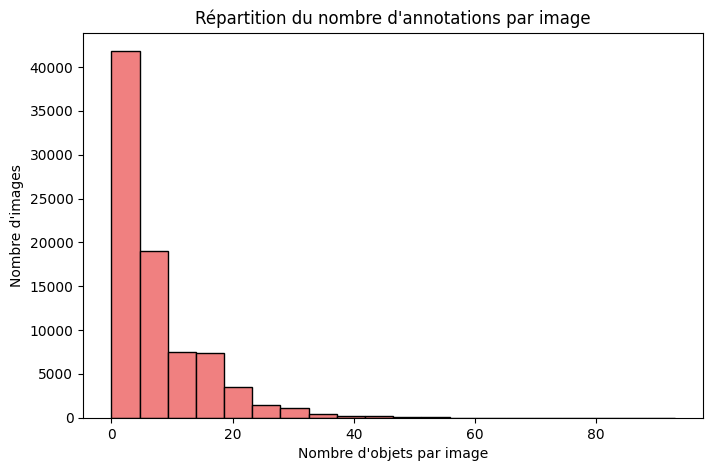

Nombre moyen d'objets par image : 7.31
Nombre maximal d'objets dans une image : 93


In [11]:
# Calculer le nombre d'annotations pour chaque image
image_ids = coco.getImgIds()  # Récupérer tous les ID d'images
annotations_per_image = [len(coco.getAnnIds(imgIds=[img_id])) for img_id in image_ids]

# Visualisation de la répartition du nombre d'annotations par image
plt.figure(figsize=(8, 5))
plt.hist(annotations_per_image, bins=20, color='lightcoral', edgecolor='black')

# Ajouter un titre et des labels d'axes
plt.title('Répartition du nombre d\'annotations par image')
plt.xlabel('Nombre d\'objets par image')
plt.ylabel('Nombre d\'images')

# Afficher le graphique
plt.show()

# Afficher des statistiques descriptives sur le nombre d'annotations
print(f"Nombre moyen d'objets par image : {sum(annotations_per_image) / len(annotations_per_image):.2f}")
print(f"Nombre maximal d'objets dans une image : {max(annotations_per_image)}")


- En moyenne, chaque image contient environ 7.31 objets. Cela signifie que les images dans ce dataset sont relativement complexes, avec plusieurs objets à détecter dans chaque image.

- Une grande proportion des images contient moins de 10 objets. Cela peut être plus facile à traiter pour des modèles de détection d'objets, mais cela signifie également qu'il existe une minorité d'images qui sont beaucoup plus complexes.

- Le nombre maximal d'objets annotés dans une image est 93, ce qui montre que certaines images du dataset sont extrêmement complexes. Ces images sont rares mais peuvent être des cas difficiles pour un modèle de détection d'objets.

# 3-Préparation-des-légendes

Avant d'utiliser les méthodes de transfert learning pour extraire les caractéristiques des images, nous devons préparer les légendes associées. Cela inclut la tokenisation des légendes et leur transformation en séquences numériques, qui seront utilisées pour entraîner le modèle LSTM.

In [14]:
# Charger les légendes à partir du fichier d'annotations JSON
def load_captions(annotations_file):
    with open(annotations_file, 'r') as file:
        data = json.load(file)
    captions = []
    for annotation in data['annotations']:
        captions.append(annotation['caption'])  # Adapter selon la structure JSON
    return captions

In [15]:
import os
import tensorflow as tf
import json
import collections

# --- Configuration des Chemins ---
base_dir = os.getcwd()  # Répertoire courant
relative_path = r"../../DataSets/Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

# Chemin pour le fichier d'annotations
train_annotations_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')

# --- Charger les légendes d'entraînement ---
def load_captions(annotations_file):
    with open(annotations_file, 'r') as f:
        annotations = json.load(f)
    
    # Grouper toutes les annotations par image
    image_path_to_caption = collections.defaultdict(list)
    for val in annotations['annotations']:
        caption = val['caption']
        # Construction du chemin d'image
        image_path = os.path.join(dataset_dir, 'train2014', f"COCO_train2014_{val['image_id']:012d}.jpg")
        image_path_to_caption[image_path].append(caption)
    
    return image_path_to_caption

# Charger les légendes
image_path_to_caption = load_captions(train_annotations_file)

# --- Étape de Réduction de l'Ensemble de Données ---
num_images_to_use = 2000  # Nombre d'images que vous souhaitez utiliser
train_image_paths = list(image_path_to_caption.keys())[:num_images_to_use]  # Limiter les chemins d'images

# Liste de toutes les annotations
train_captions = []
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    train_captions.extend(caption_list)
    img_name_vector.extend([image_path] * len(caption_list))

# Ajouter des tokens de début et de fin aux captions
train_captions = ['<start> ' + caption + ' <end>' for caption in train_captions]

# --- Tokenization des légendes ---
top_k = 5000  # Limite le vocabulaire à 5000 mots les plus fréquents
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>")
tokenizer.fit_on_texts(train_captions)

# --- Conversion des légendes en séquences d'entiers ---
train_seqs = tokenizer.texts_to_sequences(train_captions)

# --- Remplissage des séquences pour qu'elles aient toutes la même longueur ---
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

# --- Calcul de la longueur maximale des séquences ---
def calc_max_length(sequences):
    return max(len(seq) for seq in sequences)

max_length = calc_max_length(train_seqs)

# Afficher les résultats
print(f"Nombre de légendes d'entraînement: {len(train_captions)}")
print(f"Longueur maximale des séquences: {max_length}")


Nombre de légendes d'entraînement: 10005
Longueur maximale des séquences: 33


# 4-Architecture de Captioning

Il existe plusieurs architectures pour générer des légendes à partir d'images. Nous nous concentrerons sur deux approches principales :

- Injecting Architecture
- Merging Architecture

## 4.1-Injecting Architecture

Dans cette architecture, le modèle CNN (pré-entraîné) extrait des caractéristiques visuelles des images, qui sont ensuite injectées dans un RNN (par exemple, LSTM) pour générer les légendes

![image.png](https://miro.medium.com/v2/resize:fit:750/format:webp/1*cDqencLttz0zkWc__4CfFQ.png)

### 4.1.1-Choix du modèle CNN pour extraction de caractéristiques :

| **Modèle**         | **Taille des Entrées** | **Nombre de Paramètres** | **Profondeur** | **Taille du Modèle** | **Performance (ImageNet)** | **Avantages**                          | **Inconvénients**                        |
|--------------------|------------------------|--------------------------|----------------|----------------------|----------------------------|----------------------------------------|------------------------------------------|
| **InceptionV3**    | 299x299                | ~23.8 millions            | 48 couches     | ~92 MB               | Top-1: 77.9%                | - Bonne efficacité pour des tâches complexes<br>- Relativement léger | - Taille d'entrée spécifique (299x299)<br>- Plus complexe que ResNet pour certains cas |
| **ResNet50**       | 224x224                | ~25.6 millions            | 50 couches     | ~98 MB               | Top-1: 76.2%                | - Très populaire pour le transfert learning<br>- Facile à utiliser<br>- Bon équilibre entre profondeur et performance | - Peut être trop profond pour des tâches simples |
| **VGG16**          | 224x224                | ~138 millions             | 16 couches     | ~528 MB              | Top-1: 71.5%                | - Facile à comprendre et à implémenter<br>- Très utilisé dans les benchmarks | - Très grand nombre de paramètres (lent et gourmand en mémoire) |
| **EfficientNet-B0**| 224x224                | ~5.3 millions             | 82 couches     | ~29 MB               | Top-1: 77.1%                | - Très efficace en termes de taille de modèle et de calcul<br>- Bon compromis entre performance et légèreté | - Moins utilisé que ResNet ou Inception (moins de ressources disponibles) |
| **MobileNetV2**    | 224x224                | ~3.5 millions             | 53 couches     | ~14 MB               | Top-1: 71.8%                | - Modèle très léger<br>- Idéal pour des applications mobiles ou embarquées | - Performances inférieures aux autres modèles pour les tâches complexes |
| **Xception**       | 299x299                | ~22.9 millions            | 71 couches     | ~88 MB               | Top-1: 79.0%                | - Basé sur Inception, mais plus efficace pour certaines tâches<br>- Très performant | - Moins utilisé et documenté que ResNet ou Inception |
| **DenseNet121**    | 224x224                | ~8 millions               | 121 couches    | ~33 MB               | Top-1: 74.9%                | - Réseau très compact<br>- Moins de paramètres pour de bonnes performances | - Complexité due à la densité des connexions (plus lent à entraîner) |



Le transfert learning est une technique qui consiste à réutiliser un modèle pré-entraîné sur un large dataset (comme ImageNet) pour une nouvelle tâche spécifique. Cela permet d’accélérer le processus d’apprentissage et d’améliorer les performances, surtout lorsque l’on dispose de moins de données pour entraîner un modèle de zéro. Voici les principales approches du transfert learning :

### 4.1.2-Transfert learning

Le transfert learning est une technique qui consiste à réutiliser un modèle pré-entraîné sur un large dataset (comme ImageNet) pour une nouvelle tâche spécifique. Cela permet d’accélérer le processus d’apprentissage et d’améliorer les performances, surtout lorsque l’on dispose de moins de données pour entraîner un modèle de zéro. Voici les principales approches du transfert learning :

| **Technique**                 | **Description**                                                                                   | **Quand l'utiliser ?**                                                                 | **Avantages**                                                     | **Inconvénients**                                                       |
|-------------------------------|---------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------|-------------------------------------------------------------------|--------------------------------------------------------------------------|
| **Feature Extraction**         | Utiliser un modèle pré-entraîné pour extraire des **caractéristiques fixes** sans ré-entraîner le modèle. | Lorsque tu veux utiliser un modèle pré-entraîné sans le ré-entraîner sur ton dataset.   | - Rapide<br>- Nécessite peu de données.                                 | - Caractéristiques pas toujours parfaitement adaptées à ton dataset si celui-ci est très différent du dataset d'origine.    |
| **Fine Tuning (Affinage)**     | **Dégeler** certaines couches du modèle pré-entraîné et les ré-entraîner sur ton dataset spécifique. | Lorsque tu veux adapter partiellement un modèle pré-entraîné à ton dataset.             | - Adaptation plus fine au dataset<br>- Améliore souvent les performances. | - Nécessite plus de temps d'entraînement<br>- Risque de surajustement si peu de données.         |
| **Full Fine-Tuning**           | **Dégeler toutes les couches** du modèle pré-entraîné et les ré-entraîner entièrement sur ton dataset. | Lorsque ton dataset est très différent du dataset d'origine du modèle pré-entraîné.     | - Flexibilité maximale pour adapter au dataset spécifique.           | - Très long à entraîner<br>- Nécessite beaucoup de données pour éviter le surapprentissage.                    |


#### 4.1.2.A-Feature Extraction (Extraction des caractéristiques)

![image.png](https://www.researchgate.net/publication/363695026/figure/fig3/AS:11431281085332127@1663720421792/Feature-Extraction-in-Transfer-Learning.png)

Commencons par utiliser **InceptionV3**, nous allons extraire les caractéristiques (features) du modèle 

In [65]:
import os
import collections
import json
import numpy as np
import tensorflow as tf
from tqdm import tqdm

def feature_extraction(train_image_paths):
    """
    Extrait les caractéristiques des images en utilisant le modèle InceptionV3 pré-entraîné.
    
    Args:
        train_image_paths (list): Liste des chemins d'accès des images à traiter.

    Returns:
        dict: Dictionnaire des chemins d'images aux caractéristiques extraites.
    """

    # --- CONFIGURATION ---
    base_dir = os.getcwd()
    relative_path = r"../../DataSets/Dataset_delivrable_3"
    dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

    # Chemin du fichier d'annotations
    train_annotations_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')

    # Chemin du dossier contenant les images à annoter
    train_images_dir = os.path.join(dataset_dir, 'train2014/')
    PATH = train_images_dir 

    # Lecture du fichier d'annotation
    with open(train_annotations_file, 'r') as f:
        annotations = json.load(f)

    # Grouper toutes les annotations ayant le même identifiant.
    image_path_to_caption = collections.defaultdict(list)
    for val in annotations['annotations']:
        caption = val['caption']
        image_path = os.path.join(PATH, 'COCO_train2014_' + '%012d.jpg' % (val['image_id']))
        image_path_to_caption[image_path].append(caption)

    # Prendre les premières images seulement
    image_paths = list(image_path_to_caption.keys())
    train_image_paths = image_paths[:2000]

    # Téléchargement du modèle InceptionV3 pré-entrainé
    image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
    new_input = tf.keras.Input(shape=(299, 299, 3))
    hidden_layer = image_model(new_input)
    image_features_extract_model = tf.keras.Model(inputs=new_input, outputs=hidden_layer)

    # Définition de la fonction load_image
    def load_image(image_path):
        img = tf.io.read_file(image_path)               # 1. Chargement de l'image
        img = tf.image.decode_jpeg(img, channels=3)     # 2. Décodage de l'image en RGB
        img = tf.image.resize(img, [299, 299])          # 3. Redimensionnement de l'image
        img = tf.keras.applications.inception_v3.preprocess_input(img)  # 4. Normalisation
        return img, image_path

    # Pré-traitement des images
    encode_train = sorted(set(train_image_paths))

    # Création du dataset
    image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
    image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

    # Dictionnaire pour stocker les caractéristiques extraites
    image_features_dict = {}

    # Parcourir le dataset pour extraire les caractéristiques avec InceptionV3
    for img, path in tqdm(image_dataset, desc="Extracting features"):
        batch_features = image_features_extract_model(img)
        batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))
        
        for bf, p in zip(batch_features, path):
            path_of_feature = p.numpy().decode("utf-8").replace('.jpg', '_features.npy')  # Changer l'extension pour les caractéristiques
            if not os.path.exists(path_of_feature):
                np.save(path_of_feature, bf.numpy())
            image_features_dict[p.numpy().decode("utf-8")] = path_of_feature

    return image_features_dict

# --- Étape de Réduction de l'Ensemble de Données ---
num_images_to_use = 2000  # Nombre d'images que vous souhaitez utiliser
train_image_paths = list(image_path_to_caption.keys())[:num_images_to_use]  # Limiter les chemins d'images

# Exécuter l'extraction des caractéristiques
feature_extraction_Injecting_Architecture = feature_extraction(train_image_paths)


Extracting features: 100%|██████████| 125/125 [01:22<00:00,  1.52it/s]


Après avoir chargé les annotations et les images du dataset MS COCO, nous avons extrait les **caractéristiques visuelles** d'une image en utilisant le modèle pré-entraîné **InceptionV3**.

- Le message **"Loading annotations into memory..."** indique que les annotations du dataset ont été chargées et indexées, ce qui permet de manipuler les légendes et les images du dataset plus facilement.
  
- Ensuite, nous avons extrait les caractéristiques d'une image avec InceptionV3. Les **dimensions des caractéristiques extraites** sont **(1, 8, 8, 2048)** :
  - **1** : Correspond à la taille du lot (ici, 1 image est traitée).
  - **8x8** : Taille de la carte de caractéristiques générée par les couches convolutionnelles du modèle. Elle représente un résumé spatial de l'image.
  - **2048** : Nombre de filtres ou de canaux. Chaque canal capture une caractéristique visuelle particulière (textures, formes, etc.).

Ces caractéristiques seront ensuite utilisées comme entrée dans le modèle **LSTM** pour générer des légendes basées sur ces informations visuelles.


### 4.1.2.B-fine tuning affinage

![image.png](https://www.researchgate.net/profile/Esra-Alhadhrami/publication/326048343/figure/fig1/AS:643818495950849@1530509699224/Transfer-learning-approaches-a-Fine-tuning-b-CNN-as-feature-extractor.png)

In [67]:
import os
import collections
import json
import numpy as np
import tensorflow as tf
from tqdm import tqdm

def fine_tuning(train_image_paths, num_classes, annotation_file, save_model_path):
    """
    Fine-tuning d'un modèle InceptionV3 pré-entraîné avec les images fournies.
    
    Args:
        train_image_paths (list): Liste des chemins d'accès des images à traiter.
        num_classes (int): Nombre de classes à classifier.
        annotation_file (str): Chemin du fichier d'annotations JSON.
        save_model_path (str): Chemin pour sauvegarder le modèle.
    
    Returns:
        None
    """

    # --- CONFIGURATION ---
    base_dir = os.getcwd()
    relative_path = r"../../DataSets/Dataset_delivrable_3"
    dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))
    image_folder = os.path.join(dataset_dir, 'train2014/')
    PATH = image_folder

    # Lecture du fichier d'annotation
    with open(annotation_file, 'r', encoding='utf-8') as f:
        annotations = json.load(f)

    # Grouper toutes les annotations avec les chemins d'images correspondants
    image_path_to_caption = collections.defaultdict(list)
    
    for val in annotations['annotations']:
        caption = val['caption']
        image_path = os.path.join(PATH, 'COCO_train2014_' + '%012d.jpg' % (val['image_id']))
        image_path_to_caption[image_path].append(caption)

    # Liste des chemins d'images (les premières N pour un traitement plus rapide)
    image_paths = list(image_path_to_caption.keys())
    train_image_paths = image_paths[:2000]  # Limitez à 2000 images, ajustable

    # Téléchargement du modèle InceptionV3 pré-entrainé
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)
    base_model.trainable = False  # Geler les couches de base

    # Ajouter une tête de classification adaptée
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Pooling pour réduire la dimensionnalité
    x = tf.keras.layers.Dense(1024, activation='relu')(x)  # Ajouter une couche dense
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # Créer le modèle complet
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

    # Compiler le modèle avec une fonction de perte adaptée
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',  # Utilisé car les labels ne sont pas one-hot encodés
                  metrics=['accuracy'])

    # Fonction pour charger et traiter les images
    def load_image(image_path):
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [299, 299])
        img = tf.keras.applications.inception_v3.preprocess_input(img)
        return img

    # Préparer les données (images et labels)
    img_name_vector = []
    labels_vector = []
    
    for image_path in train_image_paths:
        caption_list = image_path_to_caption[image_path]
        img_name_vector.extend([image_path] * len(caption_list))
        # Utilisez une méthode pour déterminer les labels (ici un exemple simplifié)
        label = int(image_path.split('/')[-1].split('_')[1]) % num_classes  # Adapté selon votre logique de classe
        labels_vector.extend([label] * len(caption_list))

    # Créer le dataset TensorFlow avec images et labels
    image_dataset = tf.data.Dataset.from_tensor_slices((img_name_vector, labels_vector))
    image_dataset = image_dataset.map(lambda img_path, label: (load_image(img_path), label), 
                                       num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

    # --- Entraînement avec couches gelées ---
    print("\n--- Entraînement avec couches gelées ---\n")
    model.fit(image_dataset, epochs=5, verbose=1)

    # --- Débloquer certaines couches pour fine-tuning ---
    for layer in base_model.layers[-30:]:  # Débloquer les 30 dernières couches
        layer.trainable = True

    # Re-compilation du modèle avec un taux d'apprentissage plus faible pour le fine-tuning
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # --- Fine-tuning des couches débloquées ---
    print("\n--- Fine-tuning des couches débloquées ---\n")
    model.fit(image_dataset, epochs=3, verbose=1)

    # Sauvegarder le modèle
    model.save(save_model_path)
    print("\nFine-tuning terminé avec succès ! Modèle sauvegardé à", save_model_path)

# --- Paramètres du modèle et fichiers ---
num_classes = 1000  # Par exemple, 1000 classes
annotation_file = '../../DataSets/Dataset_delivrable_3/annotations/captions_train2014.json'
train_image_paths = None  # Sera déterminé plus tard
save_model_path = "fine_tuned_model.h5"  # Chemin pour sauvegarder le modèle

# Exécuter le fine-tuning
fine_tuning_Injecting_Architecture = fine_tuning(train_image_paths, num_classes, annotation_file, save_model_path)



--- Entraînement avec couches gelées ---



Training (frozen layers):   0%|          | 0/5 [00:00<?, ?it/s]


SystemError: D:\_w\1\s\Objects\listobject.c:338: bad argument to internal function

### 4.1.2.C-Full Fine Tuning

In [49]:
def full_fine_tuning(train_image_paths, num_classes, annotation_file, save_model_path):
    """
    Full Fine-tuning d'un modèle InceptionV3 pré-entraîné avec les images fournies.
    
    Args:
        train_image_paths (list): Liste des chemins d'accès des images à traiter.
        num_classes (int): Nombre de classes à classifier.
        annotation_file (str): Chemin du fichier d'annotations JSON.
        save_model_path (str): Chemin pour sauvegarder le modèle.
    
    Returns:
        None
    """

    # --- CONFIGURATION ---
    base_dir = os.getcwd()
    relative_path = r"../../DataSets/Dataset_delivrable_3"
    dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))
    image_folder = os.path.join(dataset_dir, 'train2014/')
    PATH = image_folder

    # Lecture du fichier d'annotation
    with open(annotation_file, 'r', encoding='utf-8') as f:
        annotations = json.load(f)

    # Grouper toutes les annotations avec les chemins d'images correspondants
    image_path_to_caption = collections.defaultdict(list)
    image_path_to_label = {}
    
    for val in annotations['annotations']:
        caption = val['caption']
        image_path = PATH + '\\COCO_train2014_' + '%012d.jpg' % (val['image_id'])
        image_path_to_caption[image_path].append(caption)

        # Définir les labels d'une manière cohérente avec votre jeu de données
        label = val['image_id'] % num_classes  # Exemple : utiliser l'image_id modulo num_classes comme label
        image_path_to_label[image_path] = label

    # Liste des chemins d'images (les premières N pour un traitement plus rapide)
    image_paths = list(image_path_to_caption.keys())
    train_image_paths = image_paths[:2000]  # Limitez à 2000 images, ajustable

    # Téléchargement du modèle InceptionV3 pré-entrainé
    base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False)
    base_model.trainable = True  # Débloquer toutes les couches

    # Ajouter une tête de classification adaptée
    x = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)  # Pooling pour réduire la dimensionnalité
    x = tf.keras.layers.Dense(1024, activation='relu')(x)  # Ajouter une couche dense
    predictions = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    # Créer le modèle complet
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

    # Compiler le modèle avec une fonction de perte adaptée
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Fonction pour charger et traiter les images
    def load_image(image_path, label):
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [299, 299])
        img = tf.keras.applications.inception_v3.preprocess_input(img)
        return img, label

    # Préparer les données (images et labels)
    img_name_vector = []
    labels_vector = []
    
    for image_path in train_image_paths:
        caption_list = image_path_to_caption[image_path]
        img_name_vector.extend([image_path] * len(caption_list))
        labels_vector.extend([image_path_to_label[image_path]] * len(caption_list))

    # Créer le dataset TensorFlow avec images et labels
    image_dataset = tf.data.Dataset.from_tensor_slices((img_name_vector, labels_vector))
    image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

    # --- Full Fine-Tuning ---
    print("\n--- Full Fine-Tuning ---\n")
    model.fit(image_dataset, epochs=5, verbose=1)  # Ajustez le nombre d'époques selon vos besoins

    # Sauvegarder le modèle
    model.save(save_model_path)
    print("\nFull Fine-tuning terminé avec succès ! Modèle sauvegardé à", save_model_path)

# --- Paramètres du modèle et fichiers ---
num_classes = 1000  # Par exemple, 1000 classes
annotation_file = '../../DataSets/Dataset_delivrable_3/annotations/captions_train2014.json'
train_image_paths = None  # Sera déterminé plus tard
save_model_path = "full_fine_tuned_model.h5"  # Chemin pour sauvegarder le modèle

# Exécuter le full fine-tuning
full_fine_tuning_Injecting_Architecture = full_fine_tuning(train_image_paths, num_classes, annotation_file, save_model_path)



--- Full Fine-Tuning ---

Epoch 1/5
626/626 ━━━━━━━━━━━━━━━━━━━━ 488s 752ms/step - accuracy: 0.0032 - loss: 6.9650
Epoch 2/5
626/626 ━━━━━━━━━━━━━━━━━━━━ 551s 881ms/step - accuracy: 0.1211 - loss: 6.2803
Epoch 3/5
626/626 ━━━━━━━━━━━━━━━━━━━━ 497s 795ms/step - accuracy: 0.3705 - loss: 5.6704
Epoch 4/5
626/626 ━━━━━━━━━━━━━━━━━━━━ 492s 787ms/step - accuracy: 0.6090 - loss: 5.0991
Epoch 5/5
626/626 ━━━━━━━━━━━━━━━━━━━━ 488s 779ms/step - accuracy: 0.8227 - loss: 4.5802



Full Fine-tuning terminé avec succès ! Modèle sauvegardé à full_fine_tuned_model.h5


### 4.1.3-Construction du modele RNN

Les RNN (Réseaux de Neurones Récurents) sont particulièrement adaptés pour modéliser les données séquentielles, comme le langage naturel. Contrairement aux réseaux de neurones traditionnels, les RNN peuvent conserver une mémoire des états passés lors du traitement d'une séquence, ce qui est essentiel pour comprendre le contexte dans les tâches comme la génération de légendes d'images.

Dans le cadre de ce projet, les RNN sont utilisés pour générer des légendes descriptives d'images, car ils peuvent modéliser les relations entre les mots d'une légende et apprendre comment une séquence de mots est structurée. En combinant cela avec les caractéristiques visuelles extraites des images via des techniques de transfert learning, le modèle peut comprendre à la fois l'information visuelle et textuelle.

#### Comparatif des architectures RNN existantes

| Architecture RNN | Description | Avantages | Inconvénients |
|------------------|-------------|-----------|---------------|
| **RNN simple**   | Le réseau récurrent classique, qui traite chaque élément d'une séquence un par un tout en conservant une mémoire de l'état précédent. | - Simple à implémenter.<br>- Moins de paramètres que LSTM ou GRU. | - **Problème de gradient qui disparaît**, surtout sur de longues séquences.<br>- Ne peut pas bien modéliser les longues dépendances. |
| **LSTM (Long Short-Term Memory)** | Variante des RNN, avec des mécanismes de mémoire (cellules LSTM, portes d'entrée, d'oubli et de sortie) pour conserver l'information sur de longues séquences. | - Capable de capturer des **longues dépendances**.<br>- Gère mieux le problème de gradient qui disparaît. | - Plus complexe et plus lent à entraîner en raison du nombre élevé de paramètres.<br>- Plus coûteux en mémoire. |
| **GRU (Gated Recurrent Unit)** | Variante simplifiée des LSTM, avec un mécanisme de **portes** (porte de mise à jour et porte de réinitialisation) pour contrôler le flux d'information. | - **Moins de paramètres** que LSTM, donc plus rapide et moins coûteux à entraîner.<br>- Performances comparables aux LSTM sur de nombreuses tâches. | - Moins flexible que LSTM pour capturer des dépendances complexes.<br>- Peut être moins performant que LSTM sur de très longues séquences. |
| **Bi-RNN (RNN bidirectionnel)** | Les **RNN bidirectionnels** traitent une séquence dans les deux sens (avant et arrière), permettant au réseau de prendre en compte le contexte passé et futur. | - Peut mieux capturer le contexte global d'une séquence. | - Double le nombre de calculs.<br>- Plus complexe et coûteux en temps et en mémoire. |


![image.png](https://aiml.com/wp-content/uploads/2023/10/rnn-lstm-gru-transformers.png)

### 4.1.3.A-Construction du modèle lstm

![image.png](https://media.licdn.com/dms/image/v2/D5612AQH7ywLf6xH_rA/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1690356194969?e=2147483647&v=beta&t=S-frcgtTyzrBWZ0K3K_GqK8dZ6OGA5oPtLzIRwRG74M)

In [80]:
# Construction du modèle LSTM
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Add, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def build_lstm_model(vocab_size, embedding_dim=256, units=512):
    """
    Construction d'un modèle LSTM pour la génération de légendes
    prenant en entrée les caractéristiques visuelles extraites et les légendes tokenisées.
    """
    
    # Partie CNN (caractéristiques d'image)
    image_input = Input(shape=(8, 8, 2048))  # Taille des caractéristiques extraites d'InceptionV3
    x1 = GlobalAveragePooling2D()(image_input)  
    x1 = Dense(units)(x1)  

    # Partie RNN (légendes textuelles)
    caption_input = Input(shape=(None,))
    x2 = Embedding(vocab_size, embedding_dim)(caption_input)  
    x2 = LSTM(units)(x2) 

    # Fusion des deux (caractéristiques visuelles + légendes)
    combined = Add()([x1, x2])  
    output = Dense(vocab_size, activation='softmax')(combined)  # Prédiction du mot suivant

    model = Model(inputs=[image_input, caption_input], outputs=output)
    return model

# Hyperparamètres
vocab_size = top_k + 1  # Taille du vocabulaire
embedding_dim = 256
units = 512

# Créer le modèle
lstm_model = build_lstm_model(vocab_size, embedding_dim, units)
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
lstm_model.summary()

Model: "functional_58"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_91      │ (None, 8, 8,      │          0 │ -                 │
│ (InputLayer)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_92      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ input_layer_91[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, None, 256) │  1,280,256 │ input_layer_92[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 512)       │  1,049,088 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 512)       │  1,574,912 │ embedding_8[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_3 (Add)         │ (None, 512)       │          0 │ dense_34[0][0],   │
│                     │                   │            │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 5001)      │  2,565,513 │ add_3[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,469,769 (24.68 MB)

 Trainable params: 6,469,769 (24.68 MB)

 Non-trainable params: 0 (0.00 B)

### 4.1.3.B Construction du modèle GRU

![image.png](https://www.researchgate.net/publication/350463426/figure/fig4/AS:1012181290201090@1618334233899/Structure-of-the-gated-recurrent-unit-GRU-recurrent-network.jpg)

In [51]:
from tensorflow.keras.layers import Input, GRU, Embedding, Dense, Add, GlobalAveragePooling2D
from tensorflow.keras.models import Model

def build_gru_model(vocab_size, embedding_dim=256, units=512):
    """
    Construction d'un modèle GRU pour la génération de légendes
    prenant en entrée les caractéristiques visuelles extraites et les légendes tokenisées.
    """
    
    # Partie CNN (caractéristiques d'image)
    image_input = Input(shape=(8, 8, 2048))  # Taille des caractéristiques extraites d'InceptionV3
    x1 = GlobalAveragePooling2D()(image_input)  
    x1 = Dense(units)(x1)  

    # Partie RNN (légendes textuelles)
    caption_input = Input(shape=(None,))
    x2 = Embedding(vocab_size, embedding_dim)(caption_input)  
    x2 = GRU(units)(x2)  # Remplacer LSTM par GRU

    # Fusion des deux (caractéristiques visuelles + légendes)
    combined = Add()([x1, x2])  
    output = Dense(vocab_size, activation='softmax')(combined)  # Prédiction du mot suivant

    model = Model(inputs=[image_input, caption_input], outputs=output)
    return model

# Paramètres du modèle
vocab_size = 5000  
embedding_dim = 256
units = 512

# Créer le modèle GRU
gru_model = build_gru_model(vocab_size, embedding_dim, units)
gru_model.compile(optimizer='adam', loss='categorical_crossentropy')
gru_model.summary()


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_41      │ (None, 8, 8,      │          0 │ -                 │
│ (InputLayer)        │ 2048)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_42      │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 2048)      │          0 │ input_layer_41[0… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, None, 256) │  1,280,000 │ input_layer_42[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 512)       │  1,049,088 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gru_5 (GRU)         │ (None, 512)       │  1,182,720 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 512)       │          0 │ dense_26[0][0],   │
│                     │                   │            │ gru_5[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 5000)      │  2,565,000 │ add_1[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,076,808 (23.18 MB)

 Trainable params: 6,076,808 (23.18 MB)

 Non-trainable params: 0 (0.00 B)

### 4.1.4.Entraînement des modèle

In [68]:
import tensorflow as tf
import numpy as np
import os
import json
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from pycocotools.coco import COCO

# --- CONFIGURATION ---
base_dir = os.getcwd()
relative_path = r"../../DataSets/Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

# Chemin du fichier d'annotations
annotation_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')

# Chemin du dossier contenant les images
image_folder = os.path.join(dataset_dir, 'train2014/')

# Charger le modèle InceptionV3 sans la partie classification (include_top=False)
cnn_model = InceptionV3(weights='imagenet', include_top=False)
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-1].output)

# Fonction pour extraire les caractéristiques visuelles à la volée
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(299, 299))  
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  
    features = model.predict(img_array)  # Ici, model est un modèle Keras
    return features

# Fonction de préparation des données
def prepare_data_for_training(coco, tokenizer, max_length):
    image_features = []
    caption_sequences = []
    
    img_ids = coco.getImgIds()

    for img_id in img_ids:
        img_data = coco.loadImgs(img_id)[0]
        img_path = os.path.join(image_folder, img_data['file_name'])
        
        # Extraire les caractéristiques visuelles avec le modèle pré-entraîné
        features = extract_features(img_path, feature_extractor)
        
        # Charger les légendes associées
        ann_ids = coco.getAnnIds(imgIds=img_id)
        anns = coco.loadAnns(ann_ids)
        
        for ann in anns:
            if 'caption' in ann:  # Vérification que l'annotation contient une légende
                caption = ann['caption']
                seq = tokenizer.texts_to_sequences([caption])[0]  # Tokeniser la légende
                image_features.append(features)
                caption_sequences.append(seq)
    
    return image_features, caption_sequences

# Générateur de données pour l'entraînement en batch
def data_generator(image_features, caption_sequences, batch_size):
    while True:
        for i in range(0, len(image_features), batch_size):
            batch_image_features = np.array(image_features[i:i + batch_size])
            batch_caption_sequences = np.array(caption_sequences[i:i + batch_size])
            
            yield [batch_image_features, batch_caption_sequences], batch_caption_sequences

# Paramètres d'entraînement
batch_size = 64 
epochs = 10  
max_length = 20

# Entraîner un modèle avec une méthode de transfert learning et sauvegarder les poids et l'historique
def train_model(rnn_model, image_features, caption_sequences, max_length, batch_size, epochs):
    steps_per_epoch = len(image_features) // batch_size

    # Créer le générateur de données
    train_generator = data_generator(image_features, caption_sequences, batch_size)

    # Sauvegarde des poids pendant l'entraînement avec ModelCheckpoint
    checkpoint_path = "weights.best.hdf5"
    checkpoint = ModelCheckpoint(checkpoint_path, 
                                 monitor='loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='min')

    # EarlyStopping pour arrêter l'entraînement si la perte n'améliore plus
    early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min')

    # Entraîner le modèle et récupérer l'historique
    history = rnn_model.fit(train_generator, 
                            steps_per_epoch=steps_per_epoch, 
                            epochs=epochs,
                            callbacks=[checkpoint, early_stopping])  # Ajouter EarlyStopping ici

    # Sauvegarder l'historique dans un fichier JSON
    with open('training_history.json', 'w') as f:
        json.dump(history.history, f)

    return rnn_model 




In [75]:
import os
import collections
import json
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from pycocotools.coco import COCO

# --- CONFIGURATION ---
base_dir = os.getcwd()
relative_path = r"../../DataSets/Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))

# Chemin du fichier d'annotations
annotation_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')

# Chemin du dossier contenant les images
image_folder = os.path.join(dataset_dir, 'train2014/')

# Fonction pour extraire les caractéristiques des images
def feature_extraction(train_image_paths):
    """
    Extrait les caractéristiques des images en utilisant le modèle InceptionV3 pré-entraîné.
    
    Args:
        train_image_paths (list): Liste des chemins d'accès des images à traiter.

    Returns:
        tuple: (image_features_list, caption_sequences)
    """
    # Lecture du fichier d'annotation
    with open(annotation_file, 'r') as f:
        annotations = json.load(f)

    # Grouper toutes les annotations avec les chemins d'images correspondants
    image_path_to_caption = collections.defaultdict(list)
    for val in annotations['annotations']:
        caption = val['caption']
        image_path = os.path.join(image_folder, 'COCO_train2014_' + '%012d.jpg' % (val['image_id']))
        image_path_to_caption[image_path].append(caption)

    # Prendre les premières images seulement
    image_paths = list(image_path_to_caption.keys())
    train_image_paths = image_paths[:2000]

    # Téléchargement du modèle InceptionV3 pré-entrainé
    image_model = InceptionV3(weights='imagenet', include_top=False)
    new_input = tf.keras.Input(shape=(299, 299, 3))
    hidden_layer = image_model(new_input)
    image_features_extract_model = Model(inputs=new_input, outputs=hidden_layer)

    # Définition de la fonction load_image
    def load_image(image_path):
        img = tf.io.read_file(image_path)               # 1. Chargement de l'image
        img = tf.image.decode_jpeg(img, channels=3)     # 2. Décodage de l'image en RGB
        img = tf.image.resize(img, [299, 299])          # 3. Redimensionnement de l'image
        img = preprocess_input(img)                       # 4. Normalisation
        return img, image_path

    # Pré-traitement des images
    encode_train = sorted(set(train_image_paths))

    # Création du dataset
    image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
    image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

    # Listes pour stocker les caractéristiques extraites et les légendes
    image_features_list = []
    caption_sequences = []

    # Parcourir le dataset pour extraire les caractéristiques avec InceptionV3
    for img, path in tqdm(image_dataset, desc="Extracting features"):
        batch_features = image_features_extract_model(img)
        batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

        for bf, p in zip(batch_features, path):
            path_of_feature = p.numpy().decode("utf-8").replace('.jpg', '_features.npy')
            np.save(path_of_feature, bf.numpy())
            image_features_list.append(path_of_feature)  # Ajouter à la liste

            # Ajouter les légendes correspondantes
            caption_list = image_path_to_caption[p.numpy().decode("utf-8")]
            for caption in caption_list:
                seq = tokenizer.texts_to_sequences([caption])[0]
                caption_sequences.append(seq)

    return image_features_list, caption_sequences

# Fonction de préparation des données pour l'entraînement
def prepare_data_for_training(coco, tokenizer, max_length):
    image_features, caption_sequences = feature_extraction(train_image_paths)
    return image_features, caption_sequences

# Générateur de données pour l'entraînement en batch
def data_generator(image_features, caption_sequences, batch_size):
    while True:
        for i in range(0, len(caption_sequences), batch_size):
            batch_image_features = np.array([np.load(img_feature) for img_feature in image_features[i:i + batch_size]])
            batch_caption_sequences = tf.keras.preprocessing.sequence.pad_sequences(
                caption_sequences[i:i + batch_size], maxlen=max_length, padding='post'
            )  # Padding des séquences
            
            yield [batch_image_features, batch_caption_sequences], batch_caption_sequences

# Paramètres d'entraînement
batch_size = 64 
epochs = 10  
max_length = 20

# Entraîner un modèle avec une méthode de transfert learning et sauvegarder les poids et l'historique
def train_model(rnn_model, feature_extraction_result, max_length, batch_size, epochs):
    # Décomposer le résultat de l'extraction
    image_features, caption_sequences = feature_extraction_result

    steps_per_epoch = len(image_features) // batch_size

    # Créer le générateur de données
    train_generator = data_generator(image_features, caption_sequences, batch_size)

    # Sauvegarde des poids pendant l'entraînement avec ModelCheckpoint
    checkpoint_path = "weights.best.keras"  # Modifiez l'extension pour se conformer à Keras
    checkpoint = ModelCheckpoint(checkpoint_path, 
                                 monitor='loss', 
                                 verbose=1, 
                                 save_best_only=True, 
                                 mode='min')

    # EarlyStopping pour arrêter l'entraînement si la perte n'améliore plus
    early_stopping = EarlyStopping(monitor='loss', patience=3, verbose=1, mode='min')

    # Entraîner le modèle et récupérer l'historique
    history = rnn_model.fit(train_generator, 
                            steps_per_epoch=steps_per_epoch, 
                            epochs=epochs,
                            callbacks=[checkpoint, early_stopping])  # Ajouter EarlyStopping ici

    # Sauvegarder l'historique dans un fichier JSON
    with open('training_history.json', 'w') as f:
        json.dump(history.history, f)

    return rnn_model 

# --- Étape de Réduction de l'Ensemble de Données ---
num_images_to_use = 2000  # Nombre d'images que vous souhaitez utiliser
train_image_paths = list(image_path_to_caption.keys())[:num_images_to_use]  # Limiter les chemins d'images


# Chargement de COCO pour l'entraînement
coco = COCO(annotation_file)

# 1. Entraînement avec LSTM et Feature Extraction
trained_lstm_feature_extraction = train_model(lstm_model, 
                                               feature_extraction_Injecting_Architecture,  # Passer l'ensemble de résultats
                                               max_length, 
                                               batch_size, 
                                               epochs)


Extracting features: 100%|██████████| 125/125 [01:02<00:00,  2.01it/s]


loading annotations into memory...
Done (t=0.30s)
creating index...
index created!


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [82]:
# Importations nécessaires
import os
import collections
import json
import numpy as np
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Add, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Construction du modèle LSTM
def build_lstm_model(vocab_size, embedding_dim=256, units=512):
    """
    Construction d'un modèle LSTM pour la génération de légendes
    prenant en entrée les caractéristiques visuelles extraites et les légendes tokenisées.
    """
    # Partie CNN (caractéristiques d'image)
    image_input = Input(shape=(8, 8, 2048))  # Taille des caractéristiques extraites d'InceptionV3
    x1 = GlobalAveragePooling2D()(image_input)
    x1 = Dense(units)(x1)

    # Partie RNN (légendes textuelles)
    caption_input = Input(shape=(None,))
    x2 = Embedding(vocab_size, embedding_dim)(caption_input)
    x2 = LSTM(units)(x2)

    # Fusion des deux (caractéristiques visuelles + légendes)
    combined = Add()([x1, x2])
    output = Dense(vocab_size, activation='softmax')(combined)  # Prédiction du mot suivant

    model = Model(inputs=[image_input, caption_input], outputs=output)
    return model

# Fonction d'extraction des caractéristiques d'image
def feature_extraction(train_image_paths):
    """
    Extrait les caractéristiques des images en utilisant le modèle InceptionV3 pré-entraîné.
    """
    # Chemin d'accès aux données
    base_dir = os.getcwd()
    relative_path = r"../../DataSets/Dataset_delivrable_3"
    dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))
    train_annotations_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')
    train_images_dir = os.path.join(dataset_dir, 'train2014/')
    PATH = train_images_dir

    # Lecture des annotations
    with open(train_annotations_file, 'r') as f:
        annotations = json.load(f)

    image_path_to_caption = collections.defaultdict(list)
    for val in annotations['annotations']:
        caption = val['caption']
        image_path = os.path.join(PATH, 'COCO_train2014_' + '%012d.jpg' % (val['image_id']))
        image_path_to_caption[image_path].append(caption)

    # Limiter à 2000 images
    train_image_paths = list(image_path_to_caption.keys())[:2000]

    # Téléchargement du modèle InceptionV3 pré-entrainé
    image_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
    new_input = tf.keras.Input(shape=(299, 299, 3))
    hidden_layer = image_model(new_input)
    image_features_extract_model = tf.keras.Model(inputs=new_input, outputs=hidden_layer)

    # Fonction de chargement d'image
    def load_image(image_path):
        img = tf.io.read_file(image_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [299, 299])
        img = tf.keras.applications.inception_v3.preprocess_input(img)
        return img, image_path

    # Pré-traitement des images
    encode_train = sorted(set(train_image_paths))
    image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
    image_dataset = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

    # Dictionnaire pour stocker les caractéristiques extraites
    image_features_dict = {}

    # Extraction des caractéristiques avec InceptionV3
    for img, path in tqdm(image_dataset, desc="Extracting features"):
        batch_features = image_features_extract_model(img)
        batch_features = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

        for bf, p in zip(batch_features, path):
            path_of_feature = p.numpy().decode("utf-8").replace('.jpg', '_features.npy')
            if not os.path.exists(path_of_feature):
                np.save(path_of_feature, bf.numpy())
            image_features_dict[p.numpy().decode("utf-8")] = path_of_feature

    return image_features_dict, image_path_to_caption

# Fonction de préparation des données
def prepare_data(image_features_dict, image_path_to_caption, tokenizer, max_length):
    dataset = []
    for image_path, captions in image_path_to_caption.items():
        image_features = np.load(image_features_dict[image_path])
        for caption in captions:
            seq = tokenizer.texts_to_sequences([caption])[0]
            for i in range(1, len(seq)):
                input_seq = seq[:i]
                output_seq = seq[i]
                input_seq = pad_sequences([input_seq], maxlen=max_length, padding='post')[0]
                dataset.append((image_features, input_seq, output_seq))
    return dataset

# Générateur de données
def data_generator(dataset, batch_size):
    num_samples = len(dataset)
    while True:
        for i in range(0, num_samples, batch_size):
            batch_data = dataset[i:i + batch_size]
            batch_image_features = np.array([x[0] for x in batch_data])
            batch_caption_input = np.array([x[1] for x in batch_data])
            batch_caption_output = np.array([x[2] for x in batch_data])
            yield ([batch_image_features, batch_caption_input], batch_caption_output)

# Fonction d'entraînement du modèle
def train_model(model, image_features_dict, image_path_to_caption, tokenizer, max_length, batch_size, epochs):
    dataset = prepare_data(image_features_dict, image_path_to_caption, tokenizer, max_length)
    train_data, val_data = train_test_split(dataset, test_size=0.2, random_state=42)
    train_generator = data_generator(train_data, batch_size)
    val_generator = data_generator(val_data, batch_size)
    steps_per_epoch = len(train_data) // batch_size
    validation_steps = len(val_data) // batch_size

    model.fit(train_generator,
              steps_per_epoch=steps_per_epoch,
              validation_data=val_generator,
              validation_steps=validation_steps,
              epochs=epochs)

    return model

# Paramètres
vocab_size = top_k + 1  # Taille du vocabulaire
embedding_dim = 256
units = 512
max_length = 25  # Longueur maximale des légendes
batch_size = 64  # Taille des lots d'entraînement
epochs = 10  # Nombre d'époques d'entraînement

# Créer et compiler le modèle LSTM
lstm_model = build_lstm_model(vocab_size, embedding_dim, units)
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

# Extraction des caractéristiques d'image
feature_extraction_Injecting_Architecture, image_path_to_caption = feature_extraction(train_image_paths)

# Entraînement du modèle
trained_lstm_feature_extraction = train_model(lstm_model, 
                                              feature_extraction_Injecting_Architecture, 
                                              image_path_to_caption, 
                                              tokenizer, 
                                              max_length, 
                                              batch_size, 
                                              epochs)


Extracting features: 100%|██████████| 125/125 [01:01<00:00,  2.04it/s]


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'NoneType'

In [ ]:
# Chargement de COCO pour l'entraînement
coco = COCO(annotation_file)

# 1. Entraînement avec LSTM et Feature Extraction
trained_lstm_feature_extraction = train_model(lstm_model, feature_extraction_Injecting_Architecture[0], feature_extraction_Injecting_Architecture[1], max_length, batch_size, epochs)

# Entraîner LSTM avec Fine Tuning
trained_lstm_fine_tuning = train_model(lstm_model, fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# Entraîner LSTM avec Full Fine Tuning
trained_lstm_full_fine_tuning = train_model(lstm_model, full_fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# Entraîner GRU avec Feature Extraction
trained_gru_feature_extraction = train_model(gru_model, feature_extraction_Injecting_Architecture[0], feature_extraction_Injecting_Architecture[1], max_length, batch_size, epochs)

# Entraîner GRU avec Fine Tuning
trained_gru_fine_tuning = train_model(gru_model, fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# Entraîner GRU avec Full Fine Tuning
trained_gru_full_fine_tuning = train_model(gru_model, full_fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)


In [62]:
# Chargement de COCO pour l'entraînement
coco = COCO(annotation_file)
# 1. Entraînement avec LSTM et Feature Extraction
trained_lstm_feature_extraction = train_model(lstm_model, feature_extraction_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

loading annotations into memory...
Done (t=0.33s)
creating index...
index created!


TypeError: prepare_data_for_training() takes 3 positional arguments but 4 were given

In [ ]:
# Chargement de COCO pour l'entraînement
coco = COCO(annotation_file)

# --- Préparation des données d'entraînement ---
# 1. Entraînement avec LSTM et Feature Extraction
trained_lstm_feature_extraction = train_model(lstm_model, feature_extraction_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# 2. Entraînement avec Fine Tuning
trained_lstm_fine_tuning = train_model(lstm_model, fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# 3. Entraînement avec Full Fine Tuning
trained_lstm_full_fine_tuning = train_model(lstm_model, full_fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# 4. Entraîner GRU avec Feature Extraction
trained_gru_feature_extraction = train_model(gru_model, feature_extraction_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# 5. Entraîner GRU avec Fine Tuning
trained_gru_fine_tuning = train_model(gru_model, fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)

# 6. Entraîner GRU avec Full Fine Tuning
trained_gru_full_fine_tuning = train_model(gru_model, full_fine_tuning_Injecting_Architecture, tokenizer, coco, max_length, batch_size, epochs)


100%|██████████| 125/125 [02:26<00:00,  1.17s/it]


10005 10005
Epoch 2 Batch 0 Loss 1.4885
Epoch 2 Batch 100 Loss 1.4393
Epoch 2 Loss 1.439394
Time taken for 1 epoch 140.76749777793884 sec

Epoch 3 Batch 0 Loss 1.2860
Epoch 3 Batch 100 Loss 1.2713
Epoch 3 Loss 1.271807
Time taken for 1 epoch 115.46769642829895 sec

Epoch 4 Batch 0 Loss 1.1814
Epoch 4 Batch 100 Loss 1.1124
Epoch 4 Loss 1.169204
Time taken for 1 epoch 123.8089005947113 sec

Epoch 5 Batch 0 Loss 1.0759
Epoch 5 Batch 100 Loss 1.0156
Epoch 5 Loss 1.087420
Time taken for 1 epoch 115.72289276123047 sec

Epoch 6 Batch 0 Loss 1.1042
Epoch 6 Batch 100 Loss 0.9394
Epoch 6 Loss 1.016949
Time taken for 1 epoch 118.09839034080505 sec

Epoch 7 Batch 0 Loss 0.9597
Epoch 7 Batch 100 Loss 0.9702
Epoch 7 Loss 0.951584
Time taken for 1 epoch 119.03483080863953 sec

Epoch 8 Batch 0 Loss 0.9166
Epoch 8 Batch 100 Loss 0.9792
Epoch 8 Loss 0.897221
Time taken for 1 epoch 118.74713182449341 sec

Epoch 9 Batch 0 Loss 0.8150
Epoch 9 Batch 100 Loss 0.8122
Epoch 9 Loss 0.846571
Time taken for 1 epo

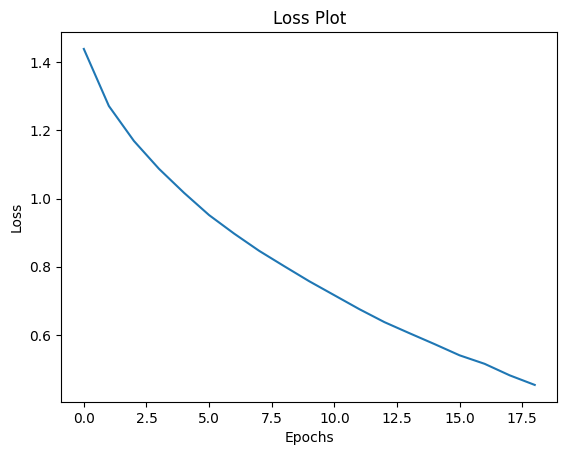

In [108]:
import tensorflow as tf

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

import collections
import random
import re
import numpy as np
import os
import time
import json
from glob import glob
from PIL import Image
import pickle
from tqdm import tqdm
# --- CONFIGURATION ---
base_dir = os.getcwd()
relative_path = r"../../DataSets/Dataset_delivrable_3"
dataset_dir = os.path.normpath(os.path.join(base_dir, relative_path))


# Chemin du fichier d'annotations
annotation_folder = os.path.join(dataset_dir, 'annotations')
annotation_file = os.path.join(dataset_dir, 'annotations/captions_train2014.json')

# Chemin du dossier contenant les images à annoter
image_folder = os.path.join(dataset_dir, 'train2014/')
PATH = image_folder

# Lecture du fichier d'annotation
with open(annotation_file, 'r') as f:
    annotations = json.load(f)

# Grouper toutes les annotations ayant le meme identifiant.
image_path_to_caption = collections.defaultdict(list)
for val in annotations['annotations']:
    # marquer le debut et la fin de chaque annotation
    caption = val['caption']
    # L'identifiant d'une image fait partie de son chemin d'accès
    image_path = PATH + '\\COCO_train2014_' + '%012d.jpg' % (val['image_id'])
    # Rajout du caption associé à image_path
    image_path_to_caption[image_path].append(caption)
    
# Prendre les premières images seulement
image_paths = list(image_path_to_caption.keys())
train_image_paths = image_paths[:2000]

# Liste de toutes les annotations
train_captions = []
# Liste de tous les noms de fichiers des images dupliquées (en nombre d'annotations par image)
img_name_vector = []

for image_path in train_image_paths:
    caption_list = image_path_to_caption[image_path]
    # Rajout de caption_list dans train_captions
    train_captions.extend(caption_list)
    # Rajout de image_path dupliquée len(caption_list) fois
    img_name_vector.extend([image_path] * len(caption_list))

    # Ajouter des tokens de début et de fin aux captions
train_captions = ['<start> ' + caption + ' <end>' for caption in train_captions]

top_k = 5000
# Initialisation du tokenizer
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k, oov_token="<unk>")
tokenizer.fit_on_texts(train_captions)

# Vérifiez et ajoutez le token <start> au vocabulaire si nécessaire
if '<start>' not in tokenizer.word_index:
    tokenizer.word_index['<start>'] = len(tokenizer.word_index) + 1


# Telechargement du modèle InceptionV3 pré-entrainé avec la cassification sur ImageNet
image_model = tf.keras.applications.InceptionV3(include_top=False,
                                                weights='imagenet')
# Creation d'une variable qui sera l'entrée du nouveau modèle de pre-traitement d'images
new_input = tf.keras.Input(shape=(299, 299, 3))
# récupérer la dernière couche caché qui contient l'image en representation compacte
hidden_layer = image_model(new_input) 


# Modèle qui calcule une representation dense des images avec InceptionV3
image_features_extract_model = tf.keras.Model(inputs=new_input, outputs=hidden_layer)

# Définition de la fonction load_image
def load_image(image_path):
    """
    La fonction load_image a pour entrée le chemin d'une image et pour sortie un couple
    contenant l'image traitée ainsi que son chemin d'accès.
    La fonction load_image effectue les traitement suivant:
        1. Chargement du fichier correspondant au chemin d'accès image_path
        2. Décodage de l'image en RGB.
        3. Redimensionnement de l'image en taille (299, 299).
        4. Normalisation des pîxels de l'image entre -1 et 1
    """
    img = tf.io.read_file(image_path)               # 1. Chargement de l'image
    img = tf.image.decode_jpeg(img, channels=3)     # 2. Décodage de l'image en RGB
    img = tf.image.resize(img, [299, 299])          # 3. Redimensionnement de l'image
    img = tf.keras.applications.inception_v3.preprocess_input(img)  # 4. Normalisation des pixels entre -1 et 1
    return img, image_path

# Pré-traitement des images
# Prendre les noms des images
encode_train = sorted(set(img_name_vector))

# Creation d'une instance de "tf.data.Dataset" partant des noms des images 
image_dataset = tf.data.Dataset.from_tensor_slices(encode_train)
# Division du données en batchs après application du pré-traitement fait par load_image
image_dataset = image_dataset.map(
  load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE).batch(16)

# Parcourir le dataset batch par batch pour effectuez le pré-traitement d'InceptionV3
for img, path in tqdm(image_dataset):
    # Pré-traitement du batch (de taille (16,8,8,2048)) courant par InceptionV3 
    batch_features = image_features_extract_model(img)
    # Resize du batch de taille (16,8,8,2048) en taille (16,64,2048)
    batch_features = tf.reshape(batch_features,
                              (batch_features.shape[0], -1, batch_features.shape[3]))
    # Parcourir le batch courant et stocker le chemin ainsi que le batch avec np.save()
    for bf, p in zip(batch_features, path):
        path_of_feature = p.numpy().decode("utf-8")
        # (chemin de l'image associe a sa nouvelle representation , representation de l'image)
        np.save(path_of_feature, bf.numpy())


# Trouver la taille maximale 
def calc_max_length(tensor):
    return max(len(t) for t in tensor)

# Chosir les 5000 mots les plus frequents du vocabulaire
top_k = 5000
#La classe Tokenizer permet de faire du pre-traitement de texte pour reseau de neurones 
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=top_k,
                                                  oov_token="<unk>",
                                                  filters=r'!"#$%&()*+.,-/:;=?@[\]^_{|}~ ')
# Construit un vocabulaire en se basant sur la liste train_captions
tokenizer.fit_on_texts(train_captions) 

# Créer le token qui sert à remplir les annotations pour egaliser leurs longueur
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>' 

# Creation des vecteurs(liste de token entiers) à partir des annotations (liste de mots)
train_seqs = tokenizer.texts_to_sequences(train_captions) 

# Remplir chaque vecteur à jusqu'à la longueur maximale des annotations
cap_vector = tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding='post')

# Calcule la longueur maximale qui est utilisée pour stocker les poids d'attention 
# Elle servira plus tard pour l'affichage lors de l'évaluation
max_length = calc_max_length(train_seqs)

import collections

img_to_cap_vector = collections.defaultdict(list)

# Création d'un dictionnaire associant les chemins des images (fichiers .npy) aux annotations.
# Les images sont dupliquées car il y a plusieurs annotations par image.
print(len(img_name_vector), len(cap_vector))
for img, cap in zip(img_name_vector, cap_vector):
    img_to_cap_vector[img].append(cap)

"""
Création des datasets de formation et de validation en utilisant 
un fractionnement 80-20 de manière aléatoire.
""" 
# Prendre les clés (noms des fichiers d'images traitées), *celles-ci ne seront pas dupliquées*.
img_keys = list(img_to_cap_vector.keys())

# Diviser les indices en entraînement et validation.
slice_index = int(len(img_keys) * 0.8)
img_name_train_keys, img_name_val_keys = img_keys[:slice_index], img_keys[slice_index:]

"""
Les jeux d'entraînement et de tests sont sous forme
de listes contenant les mappings : (image prétraitée ---> jeton d'annotation(mot)).
"""

# Boucle pour construire le jeu d'entraînement.
img_name_train = []
cap_train = []
for imgt in img_name_train_keys:
    capt_len = len(img_to_cap_vector[imgt])
    # Duplication des images en fonction du nombre d'annotations par image.
    img_name_train.extend([imgt] * capt_len)
    cap_train.extend(img_to_cap_vector[imgt])

# Boucle pour construire le jeu de validation.
img_name_val = []
cap_val = []
for imgv in img_name_val_keys:
    capv_len = len(img_to_cap_vector[imgv])
    # Duplication des images en fonction du nombre d'annotations par image.
    img_name_val.extend([imgv] * capv_len)
    cap_val.extend(img_to_cap_vector[imgv])

# Afficher la longueur des listes générées.
len(img_name_train), len(cap_train), len(img_name_val), len(cap_val)


# N'hésitez pas à modifier ces paramètres en fonction de votre machine
BATCH_SIZE = 64 # taille du batch
BUFFER_SIZE = 1000 # taille du buffer pour melanger les donnes
embedding_dim = 256
units = 512 # Taille de la couche caché dans le RNN
vocab_size = top_k + 1
num_steps = len(img_name_train) // BATCH_SIZE

# La forme du vecteur extrait à partir d'InceptionV3 est (64, 2048)
# Les deux variables suivantes representent la forme de ce vecteur
features_shape = 2048
attention_features_shape = 64

# Fonction qui charge les fichiers numpy des images prétraitées
def map_func(img_name, cap):
    img_tensor = np.load(img_name.decode('utf-8')+'.npy')
    return img_tensor, cap

# Creation d'un dataset de "Tensor"s (sert à representer de grands dataset)
# Le dataset est cree a partir de "img_name_train" et "cap_train"
dataset = tf.data.Dataset.from_tensor_slices((img_name_train, cap_train))

# L'utilisation de map permet de charger les fichiers numpy (possiblement en parallèle)
dataset = dataset.map(lambda item1, item2: tf.numpy_function(
          map_func, [item1, item2], [tf.float32, tf.int32]),
          num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Melanger les donnees et les diviser en batchs
dataset = dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
dataset = dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

class CNN_Encoder(tf.keras.Model):
    # Comme les images sont déjà prétraitées par InceptionV3 et représentées sous forme compacte
    # L'encodeur CNN ne fera que transmettre ces caractéristiques à une couche dense
    def __init__(self, embedding_dim):
        super(CNN_Encoder, self).__init__()
        # Forme après fc == (batch_size, 64, embedding_dim)
        self.fc = tf.keras.layers.Dense(embedding_dim)

    def call(self, x):
        x = self.fc(x)  # Appliquer la couche dense pour réduire la dimensionnalité
        x = tf.nn.relu(x)  # Appliquer la fonction d'activation ReLU
        return x

class BahdanauAttention(tf.keras.Model):
    def __init__(self, units):
        super(BahdanauAttention, self).__init__()
        self.W1 = tf.keras.layers.Dense(units)  # Couche dense pour les caractéristiques de l'image
        self.W2 = tf.keras.layers.Dense(units)  # Couche dense pour l'état caché
        self.V = tf.keras.layers.Dense(1)  # Couche dense pour calculer le score

    def call(self, features, hidden):
        # features (sortie du CNN_encoder) forme == (batch_size, 64, embedding_dim)

        # Forme de la couche cachée == (batch_size, hidden_size)
        # Ajouter un axe temporel pour pouvoir l'ajouter aux caractéristiques
        hidden_with_time_axis = tf.expand_dims(hidden, 1)  # forme == (batch_size, 1, hidden_size)

        # Additionner les caractéristiques et la couche cachée puis appliquer tanh
        attention_hidden_layer = tf.nn.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  # forme == (batch_size, 64, units)

        # Cela vous donne un score non normalisé pour chaque caractéristique de l'image.
        score = self.V(attention_hidden_layer)  # forme == (batch_size, 64, 1)

        # Normaliser les scores avec softmax pour obtenir les poids d'attention
        attention_weights = tf.nn.softmax(score, axis=1)  # forme == (batch_size, 64, 1)

        # Calculer le vecteur du contexte en pondérant chaque caractéristique avec le poids d'attention
        context_vector = attention_weights * features  # forme == (batch_size, 64, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)  # forme == (batch_size, embedding_dim)

        return context_vector, attention_weights


class RNN_Decoder(tf.keras.Model):
    def __init__(self, embedding_dim, units, vocab_size):
        super(RNN_Decoder, self).__init__()
        self.units = units

        # Couche d'embedding qui transforme chaque mot en un vecteur de taille embedding_dim
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)

        # GRU (Gated Recurrent Unit) pour prédire l'état caché et le mot suivant
        self.gru = tf.keras.layers.GRU(self.units,
                                       return_sequences=True,
                                       return_state=True,
                                       recurrent_initializer='glorot_uniform')

        # Couche dense qui prend en entrée la sortie du GRU
        self.fc1 = tf.keras.layers.Dense(self.units)

        # Dernière couche dense qui génère un score pour chaque mot du vocabulaire
        self.fc2 = tf.keras.layers.Dense(vocab_size)

        # Mécanisme d'attention
        self.attention = BahdanauAttention(self.units)

    def call(self, x, features, hidden):
        # L'attention est définie par un modèle à part
        context_vector, attention_weights = self.attention(features, hidden)

        # Passage du mot courant à la couche embedding
        x = self.embedding(x)  # forme == (batch_size, 1, embedding_dim)

        # Concaténation du vecteur du contexte et de l'embedding du mot courant
        x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)  # forme == (batch_size, 1, embedding_dim + units)

        # Passage du vecteur concaténé à la GRU
        output, state = self.gru(x)  # sortie == (batch_size, 1, units), état caché == (batch_size, units)

        # Couche dense
        y = self.fc1(output)  # forme == (batch_size, 1, units)

        # Redimensionnement
        y = tf.reshape(y, (-1, y.shape[2]))  # forme == (batch_size, units)

        # Dernière couche dense qui génère un score pour chaque mot du vocabulaire
        y = self.fc2(y)  # (batch_size, vocab_size)
        
        return y, state, attention_weights

    def reset_state(self, batch_size):
        return tf.zeros((batch_size, self.units))
# Création de l'encodeur
encoder = CNN_Encoder(embedding_dim)  # A COMPLETER

# Création du décodeur
decoder = RNN_Decoder(embedding_dim, units, vocab_size)  # A COMPLETER

# Optimiseur ADAM
optimizer = tf.keras.optimizers.Adam()  # A COMPLETER

# La fonction de perte
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

checkpoint_path = "./checkpoints2/train"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])
    # Restaurer le dernier checkpoint dans checkpoint_path
    ckpt.restore(ckpt_manager.latest_checkpoint)

loss_plot = []
@tf.function
def train_step(img_tensor, target):
    loss = 0

    # Initialisation de l'état caché pour chaque batch
    hidden = decoder.reset_state(batch_size=target.shape[0])
    
    # Initialiser l'entrée du décodeur
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape: # Offre la possibilité de calculer le gradient du loss
        features = encoder(img_tensor)

        for i in range(1, target.shape[1]):
            # Prédiction des i'èmes mot du batch avec le décodeur
            predictions, hidden, _ = decoder(dec_input, features, hidden)
            loss += loss_function(target[:, i], predictions)

            # Le mot correct à l'étap i est donné en entrée à l'étape (i+1)
            dec_input = tf.expand_dims(target[:, i], 1)

    total_loss = (loss / int(target.shape[1]))

    trainable_variables = encoder.trainable_variables + decoder.trainable_variables

    gradients = tape.gradient(loss, trainable_variables)

    optimizer.apply_gradients(zip(gradients, trainable_variables))

    return loss, total_loss

EPOCHS = 20

for epoch in range(start_epoch, EPOCHS):
    start = time.time()
    total_loss = 0
    
    for (batch, (img_tensor, target)) in enumerate(dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss

        if batch % 100 == 0:
            print ('Epoch {} Batch {} Loss {:.4f}'.format(
              epoch + 1, batch, batch_loss.numpy() / int(target.shape[1])))
    # sauvegarde de la perte
    loss_plot.append(total_loss / num_steps)

    if epoch % 5 == 0:
        ckpt_manager.save()

    print ('Epoch {} Loss {:.6f}'.format(epoch + 1,
                                         total_loss/num_steps))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

# Affichage de la courbe d'entrainement
plt.plot(loss_plot)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

Légende générée :  a woman in a kitchen <end>


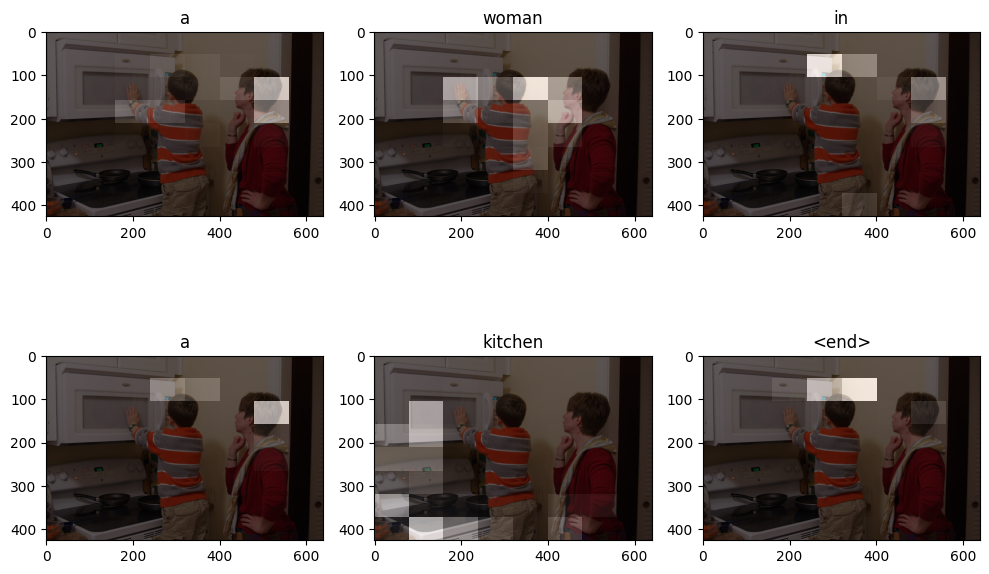

In [118]:
import matplotlib.pyplot as plt
import random
import numpy as np
import tensorflow as tf
from PIL import Image
random.seed(40)
# Fonction pour afficher les cartes d'attention
def plot_attention(image_path, result, attention_plot):
    temp_image = np.array(Image.open(image_path))
    
    fig = plt.figure(figsize=(10, 10))
    
    len_result = len(result)
    for l in range(len_result):
        temp_att = np.resize(attention_plot[l], (8, 8))  # Redimensionner l'attention pour l'affichage
        ax = fig.add_subplot(len_result // 2, len_result // 2, l+1)
        ax.set_title(result[l])
        img = ax.imshow(temp_image)
        ax.imshow(temp_att, cmap='gray', alpha=0.6, extent=img.get_extent())  # Superposer l'attention
        
    plt.tight_layout()
    plt.show()

# Fonction pour évaluer une image aléatoire
def evaluate_random_image():
    # Choisir une image aléatoire dans le dataset d'entraînement
    random_image = random.choice(img_name_val)  # Prend une image dans le dataset de validation
    
    attention_plot = np.zeros((max_length, attention_features_shape))

    hidden = decoder.reset_state(batch_size=1)

    temp_input = tf.expand_dims(load_image(random_image)[0], 0)
    img_tensor_val = image_features_extract_model(temp_input)
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder(img_tensor_val)

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden)

        attention_weights = tf.reshape(attention_weights, (-1,))
        attention_plot[i] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()
        result.append(tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return random_image, result, attention_plot

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return random_image, result, attention_plot


# Générer une légende pour une image aléatoire
random_image, result, attention_plot = evaluate_random_image()

# Afficher l'image et la légende générée
print('Légende générée : ', ' '.join(result))
plot_attention(random_image, result, attention_plot)
